In [19]:
import commonfunctions as cf # this a custom module found the commonfunctions.py
import cv2
import numpy as np
import os


In [96]:
# Function to perform the perspective transformation
def perspective_transform(img,binary):

    if img is None:
        print(f"Error: Unable to load the image.")
    else:
        # Convert the image to grayscale
        binary_image=0
        if binary==0:
            gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

            # Apply thresholding to create a binary image
            _, binary_image = cv2.threshold(gray, 50, 255, cv2.THRESH_BINARY)
        else :
            binary_image=img
        # cf.show_images([binary_image])
        # Find contours in the binary image
        contours, _ = cv2.findContours(binary_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

        # Find the largest contour based on area
        # print(len(contours))
        largest_contour = max(contours, key=cv2.contourArea)
        # Approximate the contour to a polygon
        epsilon = 0.02 * cv2.arcLength(largest_contour, True)
        approx_polygon = cv2.approxPolyDP(largest_contour, epsilon, True)

        # Get the four corners of the polygon
        corners = approx_polygon.reshape(-1, 2)
        corners = sorted(corners, key=lambda x: x[1])
        # Separate the sorted corners into top and bottom
        top_corners = sorted(corners[:2], key=lambda x: x[0])
        bottom_corners = sorted(corners[2:], key=lambda x: x[0])

        # Concatenate the sorted corners
        sorted_corners = np.concatenate([bottom_corners, top_corners])

        # Define the destination points for the perspective transformation
        dst_points = np.float32([[0, img.shape[0]], [img.shape[1], img.shape[0]], [0, 0], [img.shape[1], 0]])

        # Calculate the perspective transformation matrix
        matrix = cv2.getPerspectiveTransform(sorted_corners.astype(np.float32), dst_points)

        # Apply the perspective transformation to the image
        warped_img = cv2.warpPerspective(img, matrix, (img.shape[1], img.shape[0]))
        height,width=[warped_img.shape[0],warped_img.shape[1]]
        zoom=20
        zoomed_in_image = warped_img[zoom:height-zoom, zoom:width-zoom]
        return zoomed_in_image
def split_image(binary_image,dilated_img):

    if binary_image is None:
        print(f"Error: Unable to load the image.")
    else:
        contours, _ = cv2.findContours(dilated_img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        # Find the largest contour based on area
        # print(len(contours))
        largest_contour = max(contours, key=cv2.contourArea)
        # Approximate the contour to a polygon
        epsilon = 0.02 * cv2.arcLength(largest_contour, True)
        approx_polygon = cv2.approxPolyDP(largest_contour, epsilon, True)
        
        # Get the four corners of the polygon
        corners = approx_polygon.reshape(-1, 2)
        corners = sorted(corners, key=lambda x: x[1])
        # Separate the sorted corners into top and bottom
        top_corners = sorted(corners[:2], key=lambda x: x[0])
        bottom_corners = sorted(corners[2:], key=lambda x: x[0])

        # Concatenate the sorted corners
        sorted_corners = np.concatenate([bottom_corners, top_corners])
        # Define the destination points for the perspective transformation
        min_x, min_y = np.min(sorted_corners, axis=0)
        max_x, max_y = np.max(sorted_corners, axis=0)

        # Crop the region of interest from the original image
        bubble_sheet_section = binary_image[min_y:max_y, min_x:max_x]
        id_section = binary_image[:min_y, 0:binary_image.shape[1]]

        return [bubble_sheet_section,id_section]

def split_image_id(binary_image,dilated_img):

    if binary_image is None:
        print(f"Error: Unable to load the image.")
    else:
        contours, _ = cv2.findContours(dilated_img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        # Find the largest contour based on area
        # print(len(contours))
        largest_contour = max(contours, key=cv2.contourArea)
        # Approximate the contour to a polygon
        epsilon = 0.02 * cv2.arcLength(largest_contour, True)
        approx_polygon = cv2.approxPolyDP(largest_contour, epsilon, True)
        
        # Get the four corners of the polygon
        corners = approx_polygon.reshape(-1, 2)
        corners = sorted(corners, key=lambda x: x[1])
        # Separate the sorted corners into top and bottom
        top_corners = sorted(corners[:2], key=lambda x: x[0])
        bottom_corners = sorted(corners[2:], key=lambda x: x[0])

        # Concatenate the sorted corners
        sorted_corners = np.concatenate([bottom_corners, top_corners])
        # Define the destination points for the perspective transformation
        min_x, min_y = np.min(sorted_corners, axis=0)
        max_x, max_y = np.max(sorted_corners, axis=0)

        # Crop the region of interest from the original image
        name_section = binary_image[min_y:max_y, min_x:max_x]
        id_section = binary_image[0:binary_image.shape[0], :min_x]

        return [id_section,name_section]

# # Path to the folder containing images

# folder_path = './sample/'

# # List all files in the folder
# image_files = [f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))]
# cnt=0
# # Process each image
# for image_file in image_files:
#     image_path = os.path.join(folder_path, image_file)
#     # print(image_path)
#     if(cnt==0):
#         
# _images([perspective_transform(image_path)])
#     cnt+=1


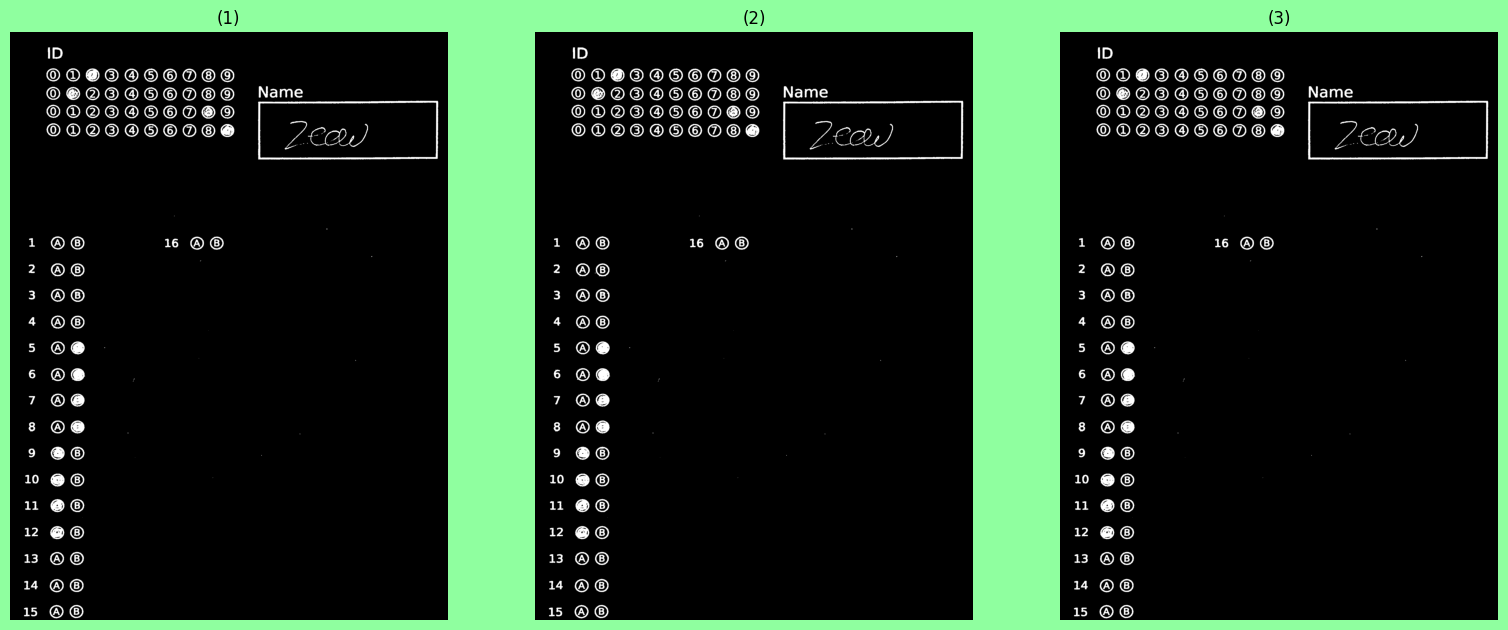

In [21]:
image_path='./samples/sample (25).jpg'

img=cv2.imread(image_path, cv2.IMREAD_COLOR)
def invert_image(img,thresh=91):
    alpha = 0.7  # Contrast control (0.0-3.0)
    beta = -50   # Brightness control (-100 to 100)
    adjusted_img = cv2.addWeighted(img, alpha, np.zeros(img.shape, img.dtype), 0, beta)
    # cf.show_images([adjusted_img])
    img=perspective_transform(adjusted_img,0)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    thresh_image = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY,151, 15)
    thresh_image=255-thresh_image
    # trial = perspective_transform(thresh_image,1)
    # cf.show_images([thresh_image])
    transform=perspective_transform(thresh_image,1)
    return transform

def show_bubbels(img):
    kernel = np.ones((2, 2), np.uint8)
    dilated_img = cv2.erode(img, kernel, iterations=1)
    kernel = np.ones((3, 3), np.uint8)

    return trial

cf.show_images([invert_image(img,thresh=15),invert_image(img),invert_image(img,thresh=151)])
def contour_dilation(img) :
     kernel = np.array((1, 10), np.uint8)
     img = cv2.dilate(img, kernel, iterations=10)
     cf.show_images([img])
     print(img)



In [22]:
def show_selected(img, kernel) :
    # kernel = np.ones((3, 3), np.uint8)
    dilated_img = cv2.dilate(img, kernel, iterations=1)
    # cf.show_images([dilated_img])

    dilated_img = cv2.erode(dilated_img, kernel, iterations=7)
    # cf.show_images([dilated_img])

    dilated_img = cv2.dilate(dilated_img, kernel, iterations=15)
    dilated_img = cv2.erode(dilated_img, kernel, iterations=6)
    dilated_img = cv2.dilate(dilated_img, kernel, iterations=8)


    return [img,dilated_img]

In [23]:
def set_whole_rows_to_zero(binary_image, num_rows=5):
    # Copy the binary image to avoid modifying the original
    modified_binary_image = np.copy(binary_image)

    # Set the values of the specified number of rows to 0
    modified_binary_image[:num_rows, :] = 0
    modified_binary_image[-num_rows:, :] = 0

    return modified_binary_image
def set_whole_columns_to_zero(binary_image, num_columns=5):
    # Copy the binary image to avoid modifying the original
    modified_binary_image = np.copy(binary_image)

    # Set the values of the specified number of rows to 0
    modified_binary_image[:,0:num_columns] = 0
    modified_binary_image[:, -num_columns:] = 0 

    return modified_binary_image

In [51]:
def bubble_vertical_mask(bubble):

    kernel = np.ones((30, 1), np.uint8) #elongate vertically
    mask = cv2.dilate(bubble, kernel, iterations=10)
    kernel2 = np.ones((1, 10), np.uint8)#make numbers touch in the same column
    mask2 = cv2.dilate(mask, kernel2, iterations=2)
    # cf.show_images([mask,mask2])
    return mask2

def id_vertical_mask(id):

    kernel = np.ones((30, 1), np.uint8) #elongate vertically
    mask = cv2.dilate(id, kernel, iterations=10)
    return mask

def pre_process(img):
    binary_image=invert_image(img)
    black_binary_image = set_whole_rows_to_zero(binary_image,20)
    black_binary_image = set_whole_columns_to_zero(black_binary_image,20)
    # cf.show_images([binary_image,test])
    kernel = np.ones((5, 5), np.uint8)
    dilated_img_filtered = cv2.erode(binary_image, kernel, iterations=1)
    kernel = np.ones((10, 30), np.uint8)
    dilated_img = cv2.dilate(dilated_img_filtered, kernel, iterations=12)
    kernel = np.ones((2, 30), np.uint8)
    dilated_img = cv2.dilate(dilated_img, kernel, iterations=30)
    # cf.show_images([binary_image,dilated_img])
    bubbles,id=split_image(binary_image,dilated_img)
    return bubbles,id

def pre_process_id(idName):
    
    return split_image_id(idName,id_vertical_mask(idName))



# image_path='./samples/sample (29).jpg'
# image=cv2.imread(image_path, cv2.IMREAD_COLOR)
# image=cv2.imread(image_path, cv2.IMREAD_COLOR) #read image
# inv=invert_image(image)
# bubble,id=pre_process(image) #preprocessing and cutting into two images
# print(image_path)
# cf.show_images([bubble,id])

In [25]:
def extract_contour_regions(image,mask):
    # Find contours in the binary image
    contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    contours = sorted(contours, key=lambda c: cv2.boundingRect(c)[0])
    max_width=0
    for contour in contours:
        x, y, w, h = cv2.boundingRect(contour)
        # print(w)
        max_width=max(max_width,w)
    # print(max_width)
    # Extract each contour region into smaller images
    full_height_contours = []
    for contour in contours:
        # Get the bounding box of the contour
        x, y, w, h = cv2.boundingRect(contour)
        if w > 0.4*max_width:
            # Extract the contour region from the original image
            contour_region = image[y:y + h, x:x + w]

            # Append the contour region to the list
            full_height_contours.append(contour_region)
        
    return full_height_contours



In [26]:
def closing_operation(binary_image, kernel_size=20,interations=3):
    # Define a kernel for the closing operation
    kernel = np.ones((kernel_size, kernel_size), np.uint8)
    
    closed_image = cv2.morphologyEx(binary_image, cv2.MORPH_CLOSE, kernel)
    
    return closed_image



In [94]:

def lit_pixels_in_contour(binary_image):
    # Thresholding (adjust the threshold value as needed)
    # _, binary_image = cv2.threshold(image, 128, 255, cv2.THRESH_BINARY)

    # Contour detection
    contours, _ = cv2.findContours(binary_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    # Calculate the contour length
    mask = np.zeros_like(binary_image)

    # List to store lit pixel count along with contours
    bubbles = []

    # Iterate through contours
    for contour in contours:

        x, y, w, h = cv2.boundingRect(contour)

        center_y = y + h // 2
        
        # Draw the contour on the mask
        cv2.drawContours(mask, [contour], -1, 255, thickness=cv2.FILLED)
        # cf.show_images([mask,binary_image])
        # Count the lit pixels within the contour region
        lit_pixel_count = np.count_nonzero(mask & binary_image)
        # print(y,lit_pixel_count)
        bubbles.append((center_y,lit_pixel_count))    
        # Reset the mask
        mask.fill(0)

    # Sort contours based on lit pixel count
    # sorted_contours = sorted(bubbles, key=lambda x: x[0], reverse=True)

    # for y,lit_pixel_count in sorted_contours:
        # print(y,lit_pixel_count)
    return bubbles

def get_centers(binary_image):

    # Contour detection
    contours, _ = cv2.findContours(binary_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)


    # List to store lit pixel count along with contours
    centers = []
        
    total_area=0
    # Iterate through contours
    # cf.show_images([binary_image])
    for contour in contours:
    
        # print(cv2.contourArea(contour))
        total_area+=cv2.contourArea(contour)
        x, y, w, h = cv2.boundingRect(contour)

        # Calculate the center using bounding box coordinates
        center_y = y + h // 2
        centers.append(center_y)
    avg_area=total_area/len(centers)
    sorted_centers = sorted(centers, key=lambda c: c)

    return sorted_centers,avg_area
def find_closest_index(target_number, number_list):
    return min(range(len(number_list)), key=lambda i: abs(number_list[i] - target_number))


def getAnswers(line):
    # cf.show_images(image)
    closed=closing_operation(line)
    centers,avg_area=get_centers(closed)
    # cf.show_images([closed,line])
    # print('len centers + avg area',len(centers),avg_area)
    # print(len(centers))
    # if(len(centers)>15):
        # cf.show_images([closed])
        # print(len(centers))
    bubbles=lit_pixels_in_contour(line)
    answered=len(centers)*[0]
    cnt=0
    # print(len(centers))
    for y,area in bubbles:
        # print(y,area,avg_area)
        if(area>0.75*avg_area):
            cnt+=1
            nearest=find_closest_index(y,centers)
            # print(y,centers[nearest],nearest,area,avg_area)
            # print(find_closest_index(y,centers))
            # print(find_closest_index(y,centers))
            # print(len(centers))
            answered[find_closest_index(y,centers)]=1
    # print(cnt)
    # print(answered)
    
    return answered
x=0
numAnswers=4




In [115]:
def extarct_code(image):
    final_code=[0,0,0,0,0,0,0]
    final_code_str=''
    bubble,full_id=pre_process(image) #preprocessing and cutting into two images
    if (len(full_id) > 0):
        code,name=pre_process_id(full_id)#cuts id name to id,name where now id is alone by it self
        mask = id_vertical_mask(code);
        id_columns=extract_contour_regions(code,mask)
        cf.show_images([code])
        cf.show_images(id_columns)
        for col_index, column in enumerate(id_columns):
            column_answer = getAnswers(column)
            print(column_answer)
            for answ_index, answer in enumerate(column_answer):
                if answ_index > 6: break
                if answer == 1:
                    final_code[answ_index] = col_index  # Append the index as a string to final_code
        for digit in final_code:
                final_code_str += str(digit)
        print("Path:",image_path," Final code:", final_code_str)

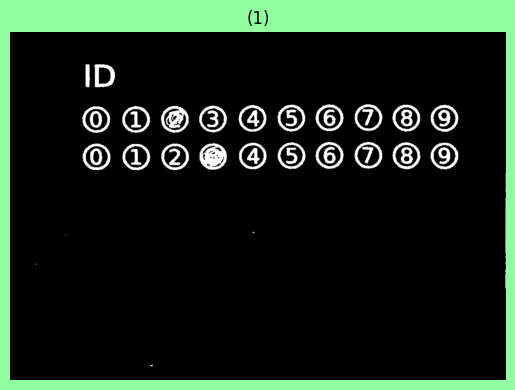

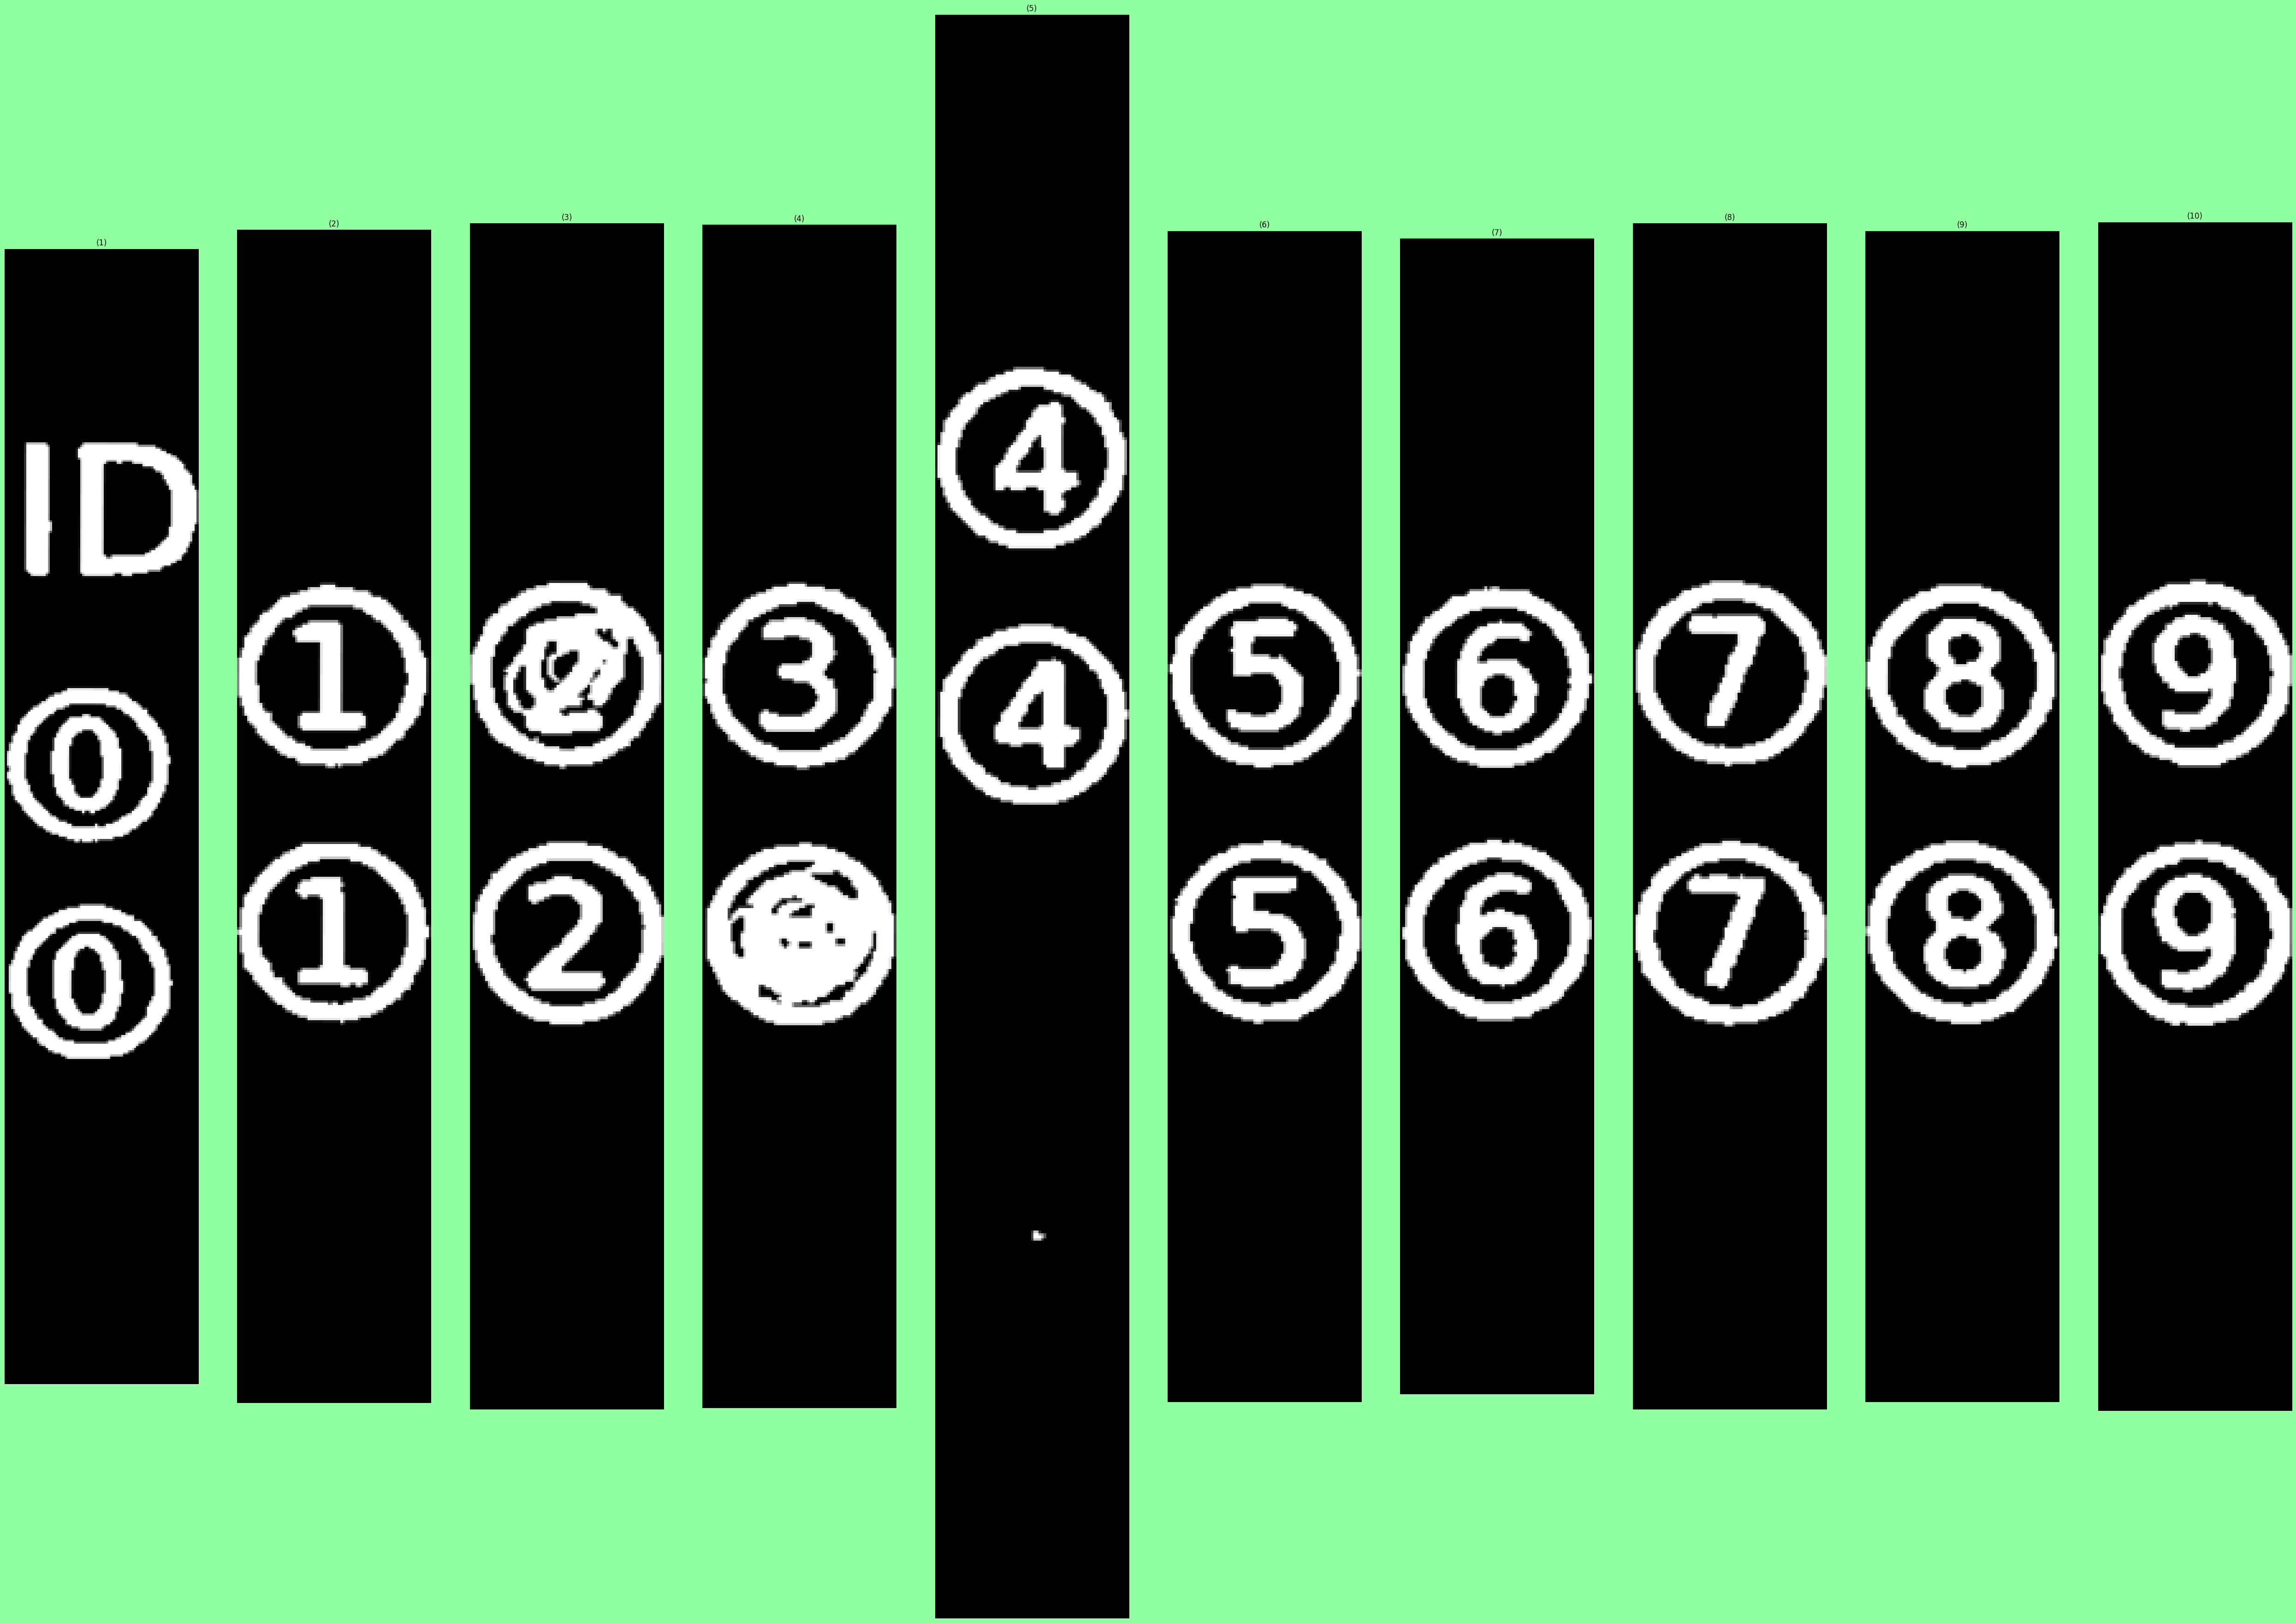

[0, 0, 0]
[0, 0]
[1, 0]
[0, 1]
[1, 1, 0]
[0, 0]
[0, 0]
[0, 0]
[0, 0]
[0, 0]
Path: ./samples/sample (37).jpg  Final code: 4400000


In [116]:
folder_path = './samples/'

# pre_process(image)
# List all files in the folder
image_files = [f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))]
# for file in image_files:
#     image_path="./samples/" + file;

image_path='./samples/sample (37).jpg'
image=cv2.imread(image_path, cv2.IMREAD_COLOR) #read image
extarct_code(image)




